# Runge-Kutta methods

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [73]:
def EulerStep(f, dx, xi, yi):
    return yi + dx*f(xi, yi)

In [106]:
def RK2Step(f, dx, xi, yi):
    k1 = dx*f(xi, yi)
    k2 = dx*f(xi + dx, yi + k1)
    
    return yi + 0.5*(k1 + k2)

In [107]:
def RK4Step(f, dx, xi, yi):
        k1 = dx*f(xi,yi)
        k2 = dx*f(xi + 0.5*dx, yi + 0.5*k1)
        k3 = dx*f(xi + 0.5*dx, yi + 0.5*k2)
        k4 = dx*f(xi + dx, yi + k3)
        
        return yi + 1/6*(k1 + 2*k2 + 2*k3 + k4)

In [126]:
def ODESolve(f, dx, x0, y0, imax, method='RK4', plotSteps=False):
    
    xi = x0
    yi = y0
    
    # Create arrays to store the steps in
    steps = np.zeros((imax+1,2))
    steps[0,0] = x0
    steps[0,1] = y0
    
    i = 0
    while i < imax:
        if(method == 'RK4'):
            yi = RK4Step(f, dx, xi, yi)
        elif(method == 'RK2'):
            yi = RK2Step(f, dx, xi, yi)
        elif(method == 'Euler'):
            yi = EulerStep(f, dx, xi, yi)
        
        xi += dx
        i  += 1
        
        # Store the steps for plotting
        steps[i, 0] = xi
        steps[i, 1] = yi  
        
    if(plotSteps):
        plt.scatter(steps[:,0], steps[:,1], color='red', linewidth='10')
        
    return [xi, yi]

In [127]:
def dydx(x,y):
    return -2*x - y

In [128]:
def yExact(x):
    return - 3*np.exp(-x) - 2*x + 2

[0.5, -0.821227295946875]

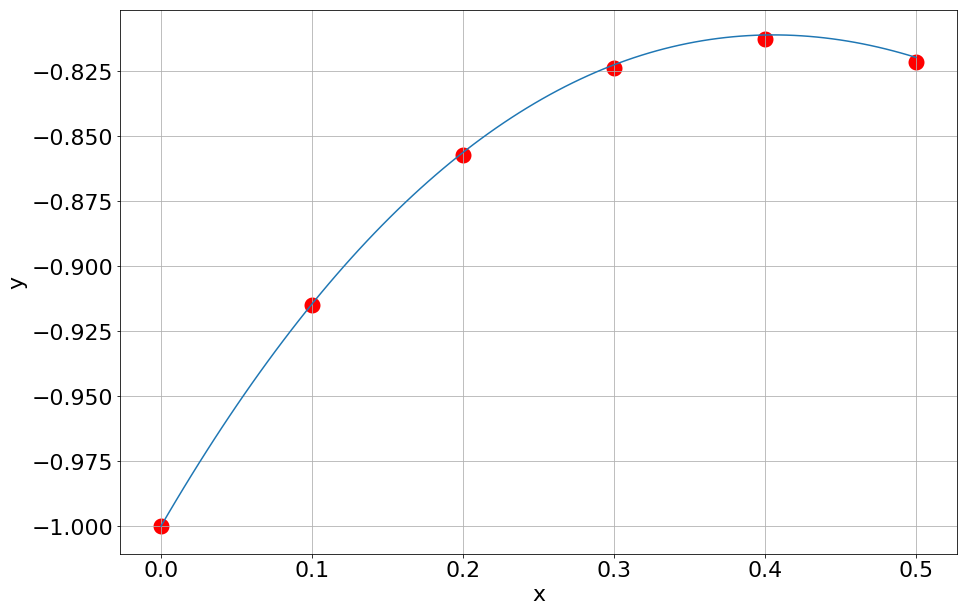

In [130]:
x = np.linspace(0, 0.5, 100)
y = yExact(x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x,y)

ODESolve(dydx, 0.1, 0, -1, 5, 'RK2', True)

## Convergence of the methods

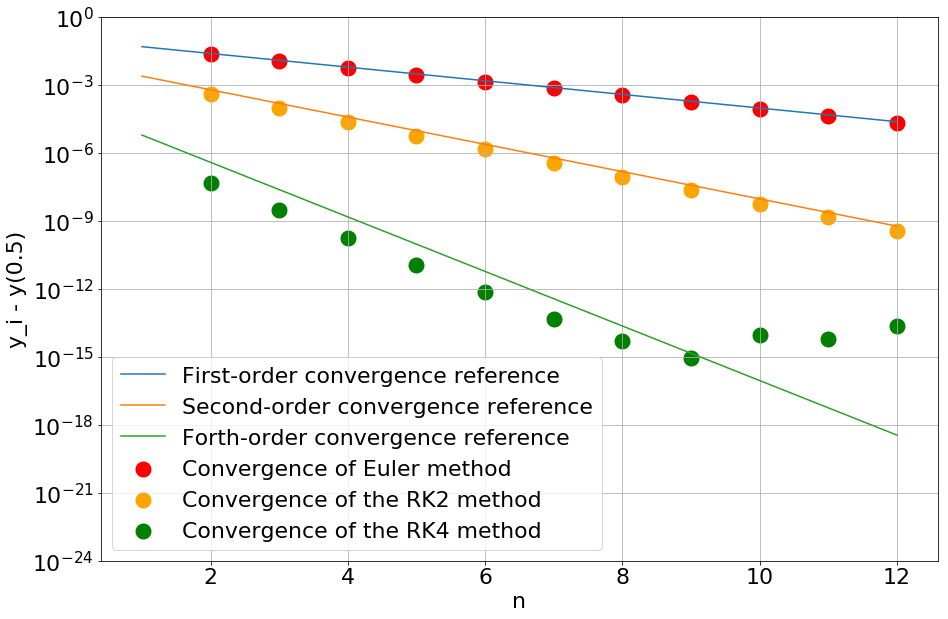

In [148]:
nmax = 12

diffEuler = np.zeros(nmax)
diffRK2 = np.zeros(nmax)
diffRK4 = np.zeros(nmax)

n = 1
while n < nmax:
    deltax       = 0.1/2**n
    nsteps       = 5*2**n
    resEuler     = ODESolve(dydx, deltax, 0, -1, nsteps, 'Euler')
    resRK2       = ODESolve(dydx, deltax, 0, -1, nsteps, 'RK2')
    resRK4       = ODESolve(dydx, deltax, 0, -1, nsteps, 'RK4')
    
    diffEuler[n] = np.abs(resEuler[1] - yExact(0.5))
    diffRK2[n]   = np.abs(resRK2[1] - yExact(0.5))
    diffRK4[n]   = np.abs(resRK4[1] - yExact(0.5))
    n += 1
    
# Plot the results
plt.grid(True)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('y_i - y(0.5)')
plt.ylim([1e-24, 1])

# Compute and plot reference curves for the convergence rate
x           = np.linspace(1, nmax, 12)
deltax      = (0.1/2**x)
firstOrder  = deltax**1
secondOrder = deltax**2
forthOrder  = deltax**4

plt.plot(x, firstOrder)
plt.plot(x, secondOrder)
plt.plot(x, forthOrder)

plt.scatter(np.arange(1,nmax+1), diffEuler, color='red', linewidth='10')
plt.scatter(np.arange(1,nmax+1), diffRK2, color='orange', linewidth='10')
plt.scatter(np.arange(1,nmax+1), diffRK4, color='green', linewidth='10')

plt.legend(['First-order convergence reference', 
            'Second-order convergence reference', 
            'Forth-order convergence reference',
            'Convergence of Euler method', 
            'Convergence of the RK2 method',
            'Convergence of the RK4 method'
           ]);

Thus we see that the RK4 method is rapidly convergent. It does require 4 evaluations of the right-hand side of the equations. The RK4 method has a good balance between between taking the least number of steps and achieving the highest accuracy.